In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv('employee_burnout_analysis-AI 2.csv')  # Adjust the path accordingly
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,30-12-2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,19-01-2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,05-11-2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,10-01-2008,Female,Service,No,2,5.0,5.9,0.52


###  Inspect the Data

In [10]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB
None
        Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2

### Handle Missing Values

In [11]:
data.fillna(data.mean(), inplace=True)  # For numerical columns
data.dropna(inplace=True)  # Drop rows with any missing value

C:\Users\Priyanka\AppData\Local\Temp/ipykernel_46660/826330478.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)  # For numerical columns


### Convert Data Types: 
Ensure that the data types are appropriate for analysis. For example, convert 'Date of Joining' to datetime format.

In [12]:
data['Date of Joining'] = pd.to_datetime(data['Date of Joining'])

## Data Exploration

#### Descriptive Statistics

In [13]:
print(data.describe())

        Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         22750.000000          22750.000000  22750.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             1.984099              1.829281      0.193267
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.700000      0.320000
50%        2.000000             4.481398              5.728188      0.452005
75%        3.000000             6.000000              6.900000      0.580000
max        5.000000            10.000000             10.000000      1.000000


#### Grouping Data

In [14]:
grouped_data = data.groupby(['Gender', 'Company Type'])['Mental Fatigue Score'].mean()
print(grouped_data)

Gender  Company Type
Female  Product         5.486045
        Service         5.486029
Male    Product         5.973983
        Service         6.005148
Name: Mental Fatigue Score, dtype: float64


#### Frequency Counts

In [15]:
gender_counts = data['Gender'].value_counts()
company_counts = data['Company Type'].value_counts()
print(gender_counts)
print(company_counts)

Female    11908
Male      10842
Name: Gender, dtype: int64
Service    14833
Product     7917
Name: Company Type, dtype: int64


## Data Visualization

#### Plotting Distributions

##### Histograms for Continuous Variables:

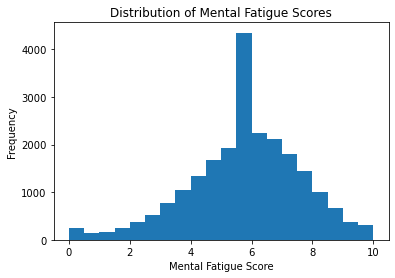

In [16]:
import matplotlib.pyplot as plt

plt.hist(data['Mental Fatigue Score'], bins=20)
plt.title('Distribution of Mental Fatigue Scores')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frequency')
plt.show()

##### Bar Charts for Categorical Variables:

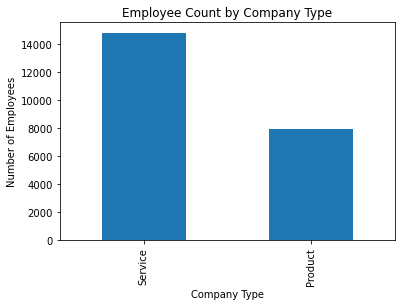

In [17]:
data['Company Type'].value_counts().plot(kind='bar')
plt.title('Employee Count by Company Type')
plt.xlabel('Company Type')
plt.ylabel('Number of Employees')
plt.show()

#### Box Plots for Outlier Detection

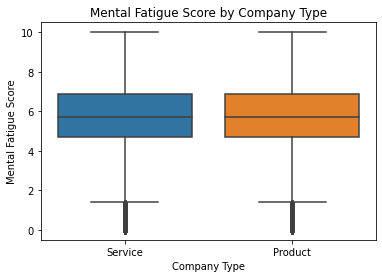

In [18]:
import seaborn as sns

sns.boxplot(x='Company Type', y='Mental Fatigue Score', data=data)
plt.title('Mental Fatigue Score by Company Type')
plt.show()

## Statistical Analysis

#### Correlation Analysis

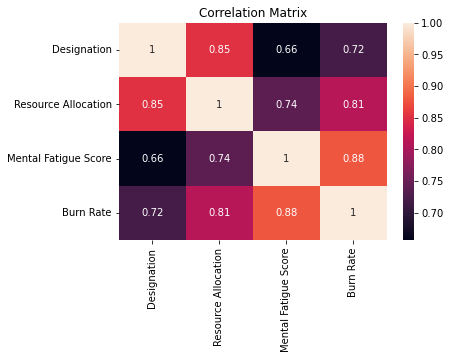

In [19]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

#### Hypothesis Testing

In [20]:
from scipy import stats

male_scores = data[data['Gender'] == 'Male']['Mental Fatigue Score']
female_scores = data[data['Gender'] == 'Female']['Mental Fatigue Score']

t_stat, p_value = stats.ttest_ind(male_scores, female_scores)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 21.128887679132124, P-value: 3.786703386131882e-98


##### Since the P-value is extremely small (much less than 0.05), we reject the null hypothesis. This means:
There is a statistically significant difference in the average Mental Fatigue Scores between male and female employees. The high T-statistic and very small P-value indicate that the difference between the two groups is not due to random chance.